# Double-diffusive convection

In this non-dimensionalization, the domain's extent is $\mathcal{O}(1)$. Refer to `demo/md/navier_stokes_non_dimensionalization.md` for details.

initial-boundary value problem on $(\textbf{x}, t)\in\Omega\times[0,\infty)$

$$\frac{\partial c}{\partial t} + \textbf{u}\cdot\nabla c = \nabla^2 c$$

$$\frac{\partial\theta}{\partial t} + \textbf{u}\cdot\nabla\theta = \frac{1}{Le}\nabla^2\theta$$

$$\nabla\cdot\textbf{u}=0$$

$$\frac{1}{Pr}\left(\frac{\partial\textbf{u}}{\partial t}+\textbf{u}\cdot\nabla\textbf{u}\right)=-\nabla p + \nabla^2\textbf{u} + Ra\rho(c,\theta)\,\textbf{e}_g$$

constitutive relation

$$\rho(c,\theta) = c - \beta\theta$$

initial conditions

$$c(\textbf{x},t=0)=c_0(\textbf{x})$$

$$\theta(\textbf{x},t=0)\theta_0(\textbf{x})$$

$$\textbf{u}(\textbf{x},t=0)=\textbf{u}_0(\textbf{x})$$

$$p(\textbf{x},t=0)=p_0(\textbf{x})$$

concentration Dirichlet boundary condition on $\textbf{x}\in\partial\Omega_{\text{D},c}$

$$c = c_{\text{D}}$$

concentration Neumann boundary condition on $\textbf{x}\in\partial\Omega_{\text{N},c}=\partial\Omega/\partial\Omega_{\text{D},c}$

$$\textbf{n}\cdot\nabla c = c_{\text{N}}$$

temperature Dirichlet boundary condition on $\textbf{x}\in\partial\Omega_{\text{D}, \theta}$

$$\theta = \theta_{\text{D}}$$

temperature Neumann boundary condition on $\textbf{x}\in\partial\Omega_{\text{N}, \theta}=\partial\Omega/\partial\Omega_{\text{D}, \theta}$

$$\textbf{n}\cdot\nabla\theta = \theta_{\text{N}}$$

essential boundary condition on $\textbf{x}\in\partial\Omega_E$

$$\textbf{n}\cdot\textbf{u} = u_{\text{E}}$$

natural boundary condition on $\textbf{x}\in\partial\Omega_{\text{N}}=\partial\Omega/\partial\Omega_{\text{E}}$

$$\sigma\cdot\textbf{n} = \boldsymbol{\sigma}_{\text{N}}$$

mapping to Navier-Stokes equations defined in `demo/py/navier_stokes.py`

$$
\begin{Bmatrix}
\rho \\
\mu \\
\textbf{f}
\end{Bmatrix}
\mapsto
\begin{Bmatrix}
\frac{1}{Pr} \\ 
1 \\
Ra\rho\,\textbf{e}_g
\end{Bmatrix}
$$

## Example: $d=2$ rectangle

$$\Omega = [0, L_x] \times [0, L_y]$$

$$\textbf{e}_g=-\textbf{e}_y$$

$$c_0(x,y)=\frac{y}{L_y}+\mathcal{N}(x,y)$$

$$\textbf{u}_0 = \textbf{0}$$

$$c(x,y=0)=0$$

$$c(x,y=L_y)=1$$

$$\frac{\partial c}{\partial x}\bigg\vert_{x=0,y}=\frac{\partial c}{\partial x}\bigg\vert_{x=L_x,y}=0$$

$$\theta_0(x,y)=1-\frac{y}{L_y}+\mathcal{N}(x,y)$$

$$\theta(x,y=0)=1$$

$$\theta(x,y=L_y)=0$$

$$\frac{\partial\theta}{\partial x}\bigg\vert_{x=0,y}=\frac{\partial\theta}{\partial x}\bigg\vert_{x=L_x,y}=0$$

$$\textbf{u}\vert_{\partial\Omega}=\textbf{0}$$

In [ ]:
import numpy as np
from lucifex.sim import integrate
from lucifex.viz import plot_colormap, plot_line
from lucifex.io import write
from lucifex.utils import maximum

from py.navier_stokes_double_diffusive import navier_stokes_double_diffusive_rectangle


Ra = 5e4
Rb = 1e5
beta = 2.0
simulation = navier_stokes_double_diffusive_rectangle(
    Lx=2.0,
    Ly=1.0,    
    Nx=64,
    Ny=64,
    cell='quadrilateral',
    Ra=Ra,
    Rb=Rb,
    Le=10.0,
    dt_max=0.01, 
)

n_stop = 400
dt_init = 1e-6
n_init = 10
integrate(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

In [3]:
2 * 5e4 == 1e5

True

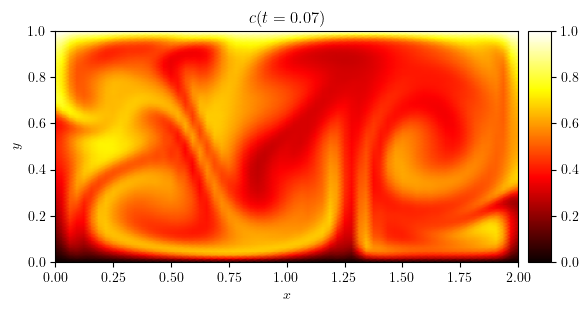

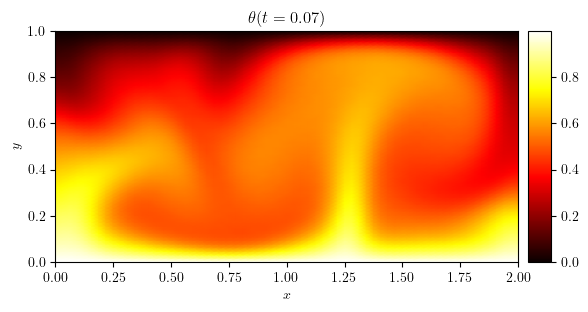

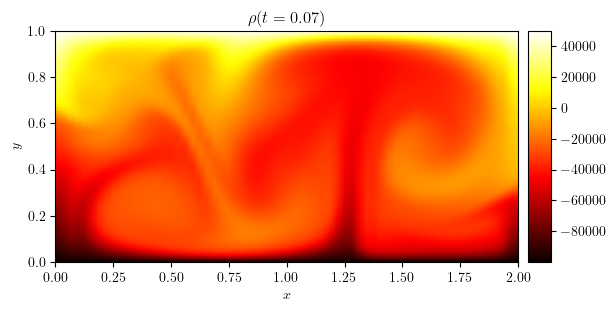

In [5]:
c, theta, rho = simulation['c', 'theta', 'rho']
mesh = c.mesh

time_index = -1

t_c = c.time_series[time_index]
fig, ax = plot_colormap(c.series[time_index], title=f'$c(t={t_c:.2f})$')
write(fig, f'A17_double_diffusive_c(t={t_c:.2f})', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

t_theta = theta.time_series[time_index]
fig, ax = plot_colormap(theta.series[time_index], title=f'$\\theta(t={t_theta:.2f})$')
write(fig, f'A17_double_diffusive_theta(t={t_theta:.2f})', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

assert np.isclose(t_c, t_theta)
rho = Ra * c.series[time_index] - Rb * theta.series[time_index]
fig, ax = plot_colormap(rho, title=f'$\\rho(t={t_c:.2f})$')
write(fig, f'A17_double_diffusive_rho(t={t_c:.2f})', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

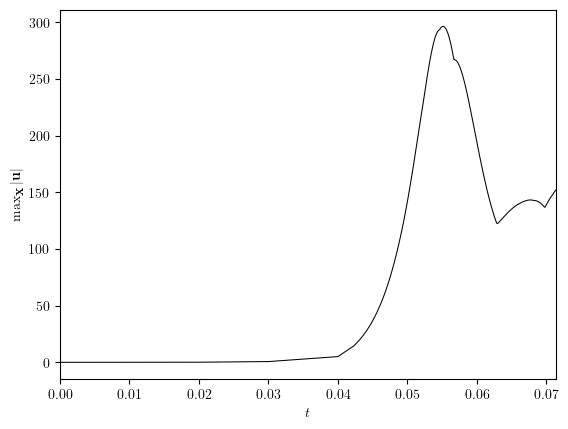

In [ ]:
u = simulation['u']
u_max = [maximum(i) for i in u.series]

fig, ax = plot_line((u.time_series, u_max), x_label='$t$', y_label='$\max_{\\textbf{x}}|\\textbf{u}|$')
write(fig, f'A19_double_diffusive_umax(t)', './figures', close=False, pickle=False)